# GLOBAL AI HUB Akbank Python Bootcamp

# Project : Pizza Ordering System 
## By : NamKodX | Namıkcan Gölova

# 1.Project Overview

Pizzacı Dükkanı mı açmak istiyorsunuz? O zaman bu proje hayalinizdeki proje olabilir. Proje, kullanıcıların kendi pizzalarını tasarlamalarını ve ödeme yaptıktan sonra kullanıcıyı veri tabanına eklemelerini hedefliyor. Peki bu projede ne tür görevlerimiz var?

Sistem, kullanıcıların menüdeki pizzayı ve istedikleri sosu seçmesiyle başlar. İkinci aşama olarak seçtikleri sos ve pizzayı seçtikten sonra ödemeye kısmına geçiş yaparlar. Kullanıcılar ödemelerini kredi kartı ile yapacaktır. Her pizzanın bir açıklaması ve fiyatı vardır. AÇıklama ve fiyat sınıflar içinde sabit bir değer olarak ayarlanması gerektiğine dikkat edin.


Projeyi birden çok şekilde yapabiliriz.
1. Daha gelişmiş bir proje için veri manipulation vb. kütüphaneler kullanılabilir
2. Arayüz tasarımı için aşağıdaki kütüphaneler eklenenilip kullanılabilir:
- PyGTK
- PyQt
- wxPython
- Tkinter

Ben daha basit olsun diye birde Tkinter kullanacağız ve bunu yaparkende Tkinter konu anlatımı olarak kendimin hazırladığı uygulamalar ve açıklamalarla dolu python notebook'unu sizlerle paylaşıyor olacağım

### Proje yapısından çıkmamaya, talimatlara uyarak projeyi tamamlamaya çalışalım

Projenin dosyası ekte yer almaktadır

# 2.Gerekli Kütüphaneleri İçe Aktarma

Pythonda kütüphaneleri import yapısı ile içeri aktarıp as ile farklı isimle kayıt alma yapılabilir

In [81]:
import csv                    #csv kütüphanesin içeri aktardik
import datetime as dt         #datetime kütüphanesini dt olarak içeri aktardık

# 3.“menu.txt” dosyasını oluşturma

Bizden projede menu.txt dosyası oluşturup aşağıdaki metni içeri yazmamızı söylüyor

- Lütfen Bir Pizza Tabanı Seçiniz:
1. Klasik
2. Margarita
3. TürkPizza
4. Sade Pizza
- ve seçeceğiniz sos:
11. Zeytin
12. Mantarlar
13. Keçi Peyniri
14. Et
15. Soğan
16. Mısır
* Teşekkür ederiz!

Biz bu yazıları nasıl menu.txt olarak kaydedebiliriz ki?
- Beginner gibi yeni menu.txt dosyası açıp içerisine yazmamız gerekeni yazmak mı
- intermediate gibi klasik olarak kod yazarak içeri aktarmak mı
- Yoksa bir expert gibi bu işlevleri veri manipülasyonu kullanarak bir excele kaydetmek mi

Aslında ben expert olanın daha güzel olacağını düşünüyorum. Lakin biz projeden sapmamak için mecburen kodlama kullanarak menu.txt metin dosyasını içeriye aktaracağız :C

Genel yapısını kullanırsak dosya açıp içeriğini düzenleyebiliriz
- open("dosya_adi.uzantı","kod",encoding="utf-8")
#####  Kod türleri
1. "r" - Okuma, varsayılan değerdir, dosyayı okumak için açar. Dosya yoksa hata verir.
2. "a" - Ekleme, dosyayı veri eklemek için açar, dosya yoksa yeni bir tane oluşturur.
3. "w" - Yazma, dosyayı yazmak için açar, dosya yoksa yeni bir tane oluşturur.
4. "x" - Oluşturma, zaten bir dosya varsa hata verir.

Biz burada w kodunu kullanırsak yeterli olacaktır

.write("Yazılacak ifade") yapısı ile içeriye yazı yazdırabiliriz

In [82]:
with open('Menu.txt', 'w',encoding="utf-8") as menu:         #Dosyayı yarattık ve menu olarak içeri aktardık ki yazma yapalım
    menu.write('* Lütfen Bir Pizza Tabanı Seçiniz: \n')
    menu.write('1: Klasik \n')
    menu.write('2: Margarita \n')
    menu.write('3: TürkPizza \n')
    menu.write('4: Sade Pizza \n')
    menu.write('* ve seçeceğiniz sos: \n')
    menu.write('11: Zeytin \n')
    menu.write('12: Mantarlar \n')
    menu.write('13: Keçi Peyniri \n')
    menu.write('14: Et \n')
    menu.write('15: Soğan \n')
    menu.write('16: Mısır \n')
    menu.write('* Teşekkür ederiz!')

encoding = "utf-8" yapısı ile dillere uyumluluk sağladık

##### Şimdi gelin dosya içeriğini ekrana yazdıralım
Bunun için dosya kodu türü r olmalıdır

In [83]:
dosya = open("Menu.txt", "r")
dosya_icerigi = dosya.read()
dosya.close()

print(dosya_icerigi)

* LÃ¼tfen Bir Pizza TabanÄ± SeÃ§iniz: 
1: Klasik 
2: Margarita 
3: TÃ¼rkPizza 
4: Sade Pizza 
* ve seÃ§eceÄŸiniz sos: 
11: Zeytin 
12: Mantarlar 
13: KeÃ§i Peyniri 
14: Et 
15: SoÄŸan 
16: MÄ±sÄ±r 
* TeÅŸekkÃ¼r ederiz!


Farkettiyseniz bozuk şekilde yazdırdı bunun sebebi encoding="utf-8" olarak açmadık.Türkçe karakterlere özellikle dikkat etmeliyiz utf-8 olmadığı yerlerde  

In [84]:
dosya = open("Menu.txt", "r",encoding="utf-8")
dosya_icerigi = dosya.read()
dosya.close()

print(dosya_icerigi)

* Lütfen Bir Pizza Tabanı Seçiniz: 
1: Klasik 
2: Margarita 
3: TürkPizza 
4: Sade Pizza 
* ve seçeceğiniz sos: 
11: Zeytin 
12: Mantarlar 
13: Keçi Peyniri 
14: Et 
15: Soğan 
16: Mısır 
* Teşekkür ederiz!


# 4.Üst sınıf oluştur "pizza"

Pizza sınıfını ve bu sınıfın içindeki encapsulation(kapsülleme) için get_description() ve get_cost() methodları tanımlayın
##### NOT: Bu açıklama hazırlanan pizzanın kısa bir açıklaması olmalıdır!

pizza sınıfı oluşturup içerisine çeşitli fonksiyonlar oluşturalım

In [18]:
class pizza:
    def __init__(self, description, cost):  #Yapıcı init fonksiyonu
        self.__description = description
        self.__cost = cost

    def get_description(self):             #Pizza açıklaması için fonksiyon
        return self.__description

    def get_cost(self):                    #Pizza bedeli için fonksiyon
        return self.__cost

# 5.Alt sınıf oluştur “pizza”

Klasik, Margherita, Türk Pizzası, Dominos Pizza vb. pizza sınıfları oluşturun. Bu pizza türlerinin her biri bir pizza türü olduğu için bu sınıflar alt sınıflar olarak tanımlanacaktır.
##### Not:Her pizzanın kendine ait bir fiyatı ve sahip olduğu değişkenin içinde pizzaların açıklamasının yer alması gerektiğini unutmayın.

Her pizza türü için açıklama ve fiyat bilgisi veren sınıflar üretelim

Pizza türleri parametre olarak yukarıda tanımlanan ana pizza clasından miras alır

Pizza türlerinin sınıflarında yer alacaklar:
- description: Malzeme bilgisi
- cost : Fiyat bilgisi : float olarak almak için virgüllü şekildedir 

##### TurkPizza 

In [19]:
class TurkPizza(pizza):
    def __init__(self, description,cost):
        description = "Türk Pizza : Domates sos, kaşar, zeytinyağı, fesleğen, sucuk, biber, sarımsak, baharatlar"
        cost = 20.0
        pizza.__init__(self,description, cost)

##### Klasik Pizza

In [20]:
class Klasik(pizza):
    def __init__(self, description,cost):
        description = "Klasik Pizza : Domates, mozzarella, fesleğen"
        cost = 30.0
        pizza.__init__(self,description, cost)

##### Margherita Pizza

In [21]:
class Margherita(pizza):
    def __init__(self, description,cost):
        description = "Margherita Pizza : Domates, mozarella, fesleğen, zeytinyağı ve baharatlar"
        cost = 35.0
        pizza.__init__(self,description, cost)

##### DominosPizza

In [22]:
class DominosPizza(pizza):
    def __init__(self, description,cost):
        description = "Dominos Pizza : Kaşar, sucuk, salam, domates, biber, zeytin, mantar, mısır ve baharatlar"
        cost = 40.0
        pizza.__init__(self,description, cost)

##### Vegan Pizza

In [23]:
class VeganPizza(pizza):
    def __init__(self, description,cost):
        description = "Vegan Pizza : Mantar, soğan, sarımsak, kurutulmuş domates, biber, zeytiyağı, patlıcan, mısır ve baharatlar"
        cost = 35.0
        pizza.__init__(self,description, cost)

# 6.Üst sınıf oluştur “Decorator”

Bir decorator sınıfı oluşturun. decorator, burada tüm sos sınıflarının süper sınıfı olarak adlandırılır.

decorator sınıfı, pizza sınıfının özelliklerini kullanarak get_description() ve get_cost() yöntemlerini kullanacaktır. Aşağıdaki yöntemleri kullanarak decorator sınıfını tamamlayın.

Burada yapacağımız şey decorator sınıfı oluşturmak bu sınıf pizza sınıfının alt sınıfı olacak sosların süper sınıfı olacak 

 İçerisinde get_cost() ve get_description() fonksiyonları yer alacaktır 

In [128]:
class decorator(pizza):
    def __init__(self,sauce, cost,  description):
        self.__cost = cost 
        self.__description = description
        self.sauce = sauce
        pizza.__init__(self, cost, description)
        
    def get_cost(self):
        return pizza.cost(self) + self.sauce.cost() 
   
    def get_description(self):
        return pizza.description(self) + ' ' + self.sauce.description()

Aşağıdaki kodları kapsülleme yapmak için yaptık
- self.__cost = cost 
- self.__description = description

Aşağıdaki kodlar pizza sınıfından miras alınanlar
- pizza.__init__(self, cost, description)

Aşağıdaki kodlar pizza ve sosların fiyatlarını toplar
- return self.sauce.get_cost() + pizza.get_cost(self)

Aşağıdaki kodlar pizza ve sosların özelliklerinin yazılmasını sağlar
- return pizza.get_description(self) + ' ' + self.sauce.get_description()

# 7.Sosların sınıflarının tanımlanması

Sos olarak Zeytin, Mantar, Keçi Peyniri, Et, Soğan ve Mısır'ı belirleyin ve belirlediğiniz sosların her birini bir sınıf olarak tanımlayın.

Unutmayın ki her sosun kendine ait bir fiyatı ve değişken olarak her bir pizzanın açıklaması olması gerekir.

Aşağıdaki kod Decorator sınıfından miras almamızı sağlar
- decorator.__init__(self, sauce, cost, description)

Soslar decorator sınıfının alt sınıfı olmalıdır 

decorator sınıfı da pizza sınıfının alt sınıfıdır

##### Zeytin sosu sınıfı

In [92]:
class Zeytin(decorator):
    def __init__(self,sauce):
        description = "Zeytin"
        cost = 3
        decorator.__init__(self, sauce, cost, description)

##### Mantar sosu sınıfı

In [93]:
class Mantar(decorator):
    def __init__(self,sauce):
        description = "Mantar"
        cost = 5
        decorator.__init__(self, sauce, cost, description)

##### Et sosu sınıfı

In [94]:
class Et(decorator):
    def __init__(self,sauce):
        description = "Et"
        cost = 10
        decorator.__init__(self, sauce, cost, description)

##### Keçi peyniri sosu sınıfı

In [95]:
class KeciPeynir(decorator):
    def __init__(self,sauce):
        description = "Keci Peyniri"
        cost = 7
        decorator.__init__(self, sauce, cost, description)

##### Mısır sosu sınıfı

In [96]:
class Misir(decorator):
    def __init__(self,sauce):
        description = "Misir"
        cost = 5
        decorator.__init__(self, sauce, cost, description)

##### Soğan sosu sınıfı

In [97]:
class Sogan(decorator):
    def __init__(self,sauce):
        description = "Sogan"
        cost = 3
        decorator.__init__(self, sauce, cost, description)

# 8.Proje arayüzü tasarlama

Arayüz için tkinter kullanacağız ve opencv gibi kütüphaneler ile adımların fotoğraflarını buraya koyabileceğiz ekstra olarak

Yapıyı nasıl kuracağımıza bakarsak pizzalar için radio soslar için ise checkbox kullanılmalıdır 

İstediğimiz menüden seçildikten sonra ödeme ekranı gelip gerekli bilgiler alınarak sipariş tamamlanıp csv kütüphanesi ile içeri aktarılacaktır bilgiler

## Gerekli kütüphanelerin içeri aktarılması

In [1]:
import tkinter as tk    #Tkinter kütüphane içeri aktarılması
import cv2 as cv        #OpenCv kütüphanesinin içeri aktarılması
import matplotlib.pyplot as plt

Öncelikle tkinter yapımızı tasarlayalım

In [99]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,600)
siparis.config(bg="green")

siparis.mainloop()

Yukarıdaki işlem siparis sayfasının ana tasarımıdır

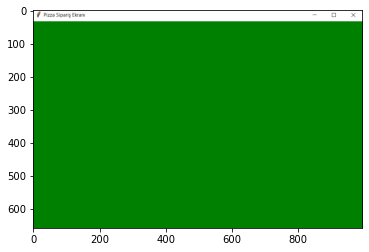

In [100]:
siparis = cv.imread("1.png")
plt.imshow(siparis)

In [101]:
odeme = tk.Tk()
odeme.title("Pizza Ödeme Ekranı")
odeme.geometry("800x500+80+110")
odeme.maxsize(800,600)
odeme.config(bg="red")

odeme.mainloop()

Yukarıdaki işlem ödeme sayfasının ana tasarımıdır

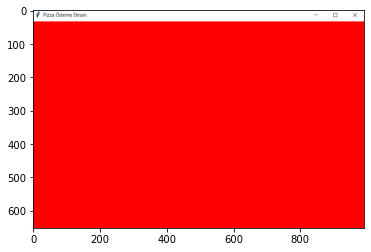

In [102]:
odeme = cv.imread("2.png")
odeme = cv.cvtColor(odeme,cv.COLOR_BGR2RGB)
plt.imshow(odeme)

Şimdi içeriği düzenlemeye koyulalım

In [103]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,600)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15,)

siparis.mainloop()

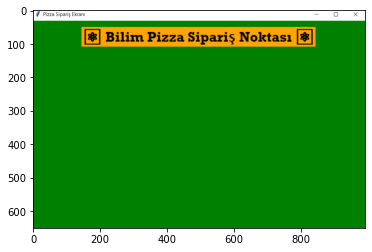

In [104]:
img = cv.imread("3.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

Şimdi pizzaları ekleyelim

In [105]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,600)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=7,anchor="center")

siparis.mainloop()

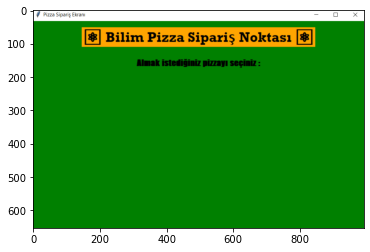

In [106]:
img = cv.imread("4.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

Pizza değişkenlerini yazalım

In [67]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,1000)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green").place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green").place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green").place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",activebackground="green",bg="green").place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",activebackground="green",bg="green").place(x = 470 ,y=300)

sos_sorusu = tk.Label(siparis,text="Almak istediğiniz ekstra sosu seçiniz :",font="Impact 15 bold",fg="black",bg="green")
sos_sorusu.pack(pady=200,anchor="center")

siparis.mainloop()

bayağı bir işlem yaptık şimdi görüntüsünü çıkartalım

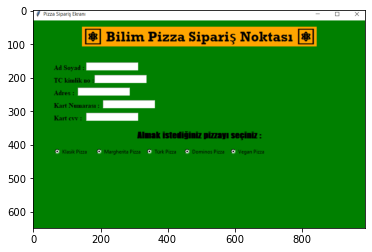

In [65]:
img = cv.imread("5.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [85]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,1000)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı ve sosları seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green").place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green").place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green").place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",bg="green").place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",bg="green").place(x = 470 ,y=300)

zeytin = tk.StringVar()
mantar = tk.StringVar()
et = tk.StringVar()
sogan = tk.StringVar()
misir = tk.StringVar()

check_zeytin = tk.Checkbutton(siparis,text="Zeytin",variable=zeytin,onvalue="Zeytin",bg="green").place(x=50,y=350)

check_mantar = tk.Checkbutton(siparis,text="Mantar",variable=mantar,onvalue="Mantar",bg="green").place(x=150,y=350)

check_et = tk.Checkbutton(siparis,text="Et",variable=et,onvalue="Etli",bg="green").place(x=270,y=350)

check_sogan = tk.Checkbutton(siparis,text="Soğan",variable=sogan,onvalue="Soğanlı",bg="green").place(x=360,y=350)

check_misir = tk.Checkbutton(siparis,text="Mısır",variable=misir,onvalue="Mısırlı",bg="green").place(x=470,y=350)

siparis.mainloop()

Yaptıklarımızı ekrana bastıralım

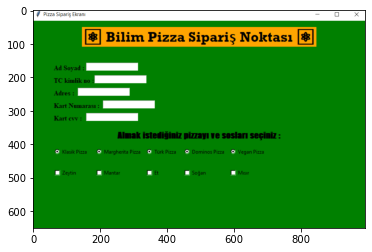

In [86]:
img = cv.imread("6.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

Şimdi ise butonları yerleştirelimm

In [98]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,1000)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı ve sosları seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green").place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green").place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green").place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",bg="green").place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",bg="green").place(x = 470 ,y=300)

zeytin = tk.StringVar()
mantar = tk.StringVar()
et = tk.StringVar()
sogan = tk.StringVar()
misir = tk.StringVar()

check_zeytin = tk.Checkbutton(siparis,text="Zeytin",variable=zeytin,onvalue="Zeytin",bg="green").place(x=50,y=350)

check_mantar = tk.Checkbutton(siparis,text="Mantar",variable=mantar,onvalue="Mantar",bg="green").place(x=150,y=350)

check_et = tk.Checkbutton(siparis,text="Et",variable=et,onvalue="Etli",bg="green").place(x=270,y=350)

check_sogan = tk.Checkbutton(siparis,text="Soğan",variable=sogan,onvalue="Soğanlı",bg="green").place(x=360,y=350)

check_misir = tk.Checkbutton(siparis,text="Mısır",variable=misir,onvalue="Mısırlı",bg="green").place(x=470,y=350)

def siparis_ver():
    pass

siparis_btn = tk.Button(siparis,text="Sipariş Ver",bg="orange",font="Times 12 bold",command=siparis_ver).place(y=400,x=200)

iptal_btn = tk.Button(siparis,text="İptal Et",bg="orange",font="Times 12 bold",command=siparis_ver).place(y=400,x=400)

siparis.mainloop()

Şimdi butonlara bakalım

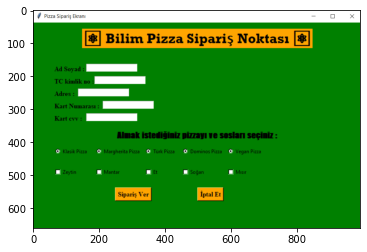

In [99]:
img = cv.imread("7.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [100]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,1000)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı ve sosları seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green").place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green").place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green").place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",bg="green").place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",bg="green").place(x = 470 ,y=300)

zeytin = tk.StringVar()
mantar = tk.StringVar()
et = tk.StringVar()
sogan = tk.StringVar()
misir = tk.StringVar()

check_zeytin = tk.Checkbutton(siparis,text="Zeytin",variable=zeytin,onvalue="Zeytin",bg="green").place(x=50,y=350)

check_mantar = tk.Checkbutton(siparis,text="Mantar",variable=mantar,onvalue="Mantar",bg="green").place(x=150,y=350)

check_et = tk.Checkbutton(siparis,text="Et",variable=et,onvalue="Etli",bg="green").place(x=270,y=350)

check_sogan = tk.Checkbutton(siparis,text="Soğan",variable=sogan,onvalue="Soğanlı",bg="green").place(x=360,y=350)

check_misir = tk.Checkbutton(siparis,text="Mısır",variable=misir,onvalue="Mısırlı",bg="green").place(x=470,y=350)

def siparis_ver():
    pass
def iptal_et():
    siparis.quit() #Formdan çıkış yapar


siparis_btn = tk.Button(siparis,text="Sipariş Ver",bg="orange",font="Times 12 bold",command=siparis_ver).place(y=400,x=200)

iptal_btn = tk.Button(siparis,text="İptal Et",bg="orange",font="Times 12 bold",command=iptal_et).place(y=400,x=400)

siparis.mainloop()

Radio buttonların biir seçilmelidir

In [12]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x500+80+110")
siparis.maxsize(800,1000)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı ve sosları seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

deger = tk.StringVar()

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green",value="Klasik",variable=deger).place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green",value="Margherita",variable=deger).place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green",value="Türk",variable=deger).place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",bg="green",value="Dominos",variable=deger).place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",bg="green",value="Vegan",variable=deger).place(x = 470 ,y=300)

zeytin = tk.StringVar()
mantar = tk.StringVar()
et = tk.StringVar()
sogan = tk.StringVar()
misir = tk.StringVar()

check_zeytin = tk.Checkbutton(siparis,text="Zeytin",variable=zeytin,onvalue="Zeytin",bg="green").place(x=50,y=350)

check_mantar = tk.Checkbutton(siparis,text="Mantar",variable=mantar,onvalue="Mantar",bg="green").place(x=150,y=350)

check_et = tk.Checkbutton(siparis,text="Et",variable=et,onvalue="Etli",bg="green").place(x=270,y=350)

check_sogan = tk.Checkbutton(siparis,text="Soğan",variable=sogan,onvalue="Soğanlı",bg="green").place(x=360,y=350)

check_misir = tk.Checkbutton(siparis,text="Mısır",variable=misir,onvalue="Mısırlı",bg="green").place(x=470,y=350)

def siparis_ver():
    pass
def iptal_et():
    siparis.quit() #Formdan çıkış yapar


siparis_btn = tk.Button(siparis,text="Sipariş Ver",bg="orange",font="Times 12 bold",command=siparis_ver).place(y=400,x=200)

iptal_btn = tk.Button(siparis,text="İptal Et",bg="orange",font="Times 12 bold",command=iptal_et).place(y=400,x=400)

siparis.mainloop()

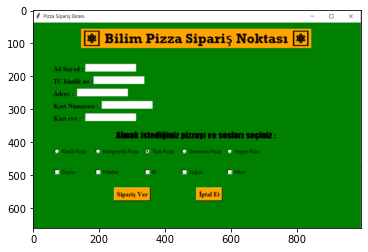

In [13]:
img = cv.imread("8.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [2]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x700+100+50")
siparis.maxsize(800,1500)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı ve sosları seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

deger = tk.StringVar()

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green",value="Klasik",variable=deger).place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green",value="Margherita",variable=deger).place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green",value="Türk",variable=deger).place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",bg="green",value="Dominos",variable=deger).place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",bg="green",value="Vegan",variable=deger).place(x = 470 ,y=300)

zeytin = tk.StringVar()
mantar = tk.StringVar()
et = tk.StringVar()
sogan = tk.StringVar()
misir = tk.StringVar()

check_zeytin = tk.Checkbutton(siparis,text="Zeytin",variable=zeytin,onvalue="Zeytin",bg="green").place(x=50,y=350)

check_mantar = tk.Checkbutton(siparis,text="Mantar",variable=mantar,onvalue="Mantar",bg="green").place(x=150,y=350)

check_et = tk.Checkbutton(siparis,text="Et",variable=et,onvalue="Etli",bg="green").place(x=270,y=350)

check_sogan = tk.Checkbutton(siparis,text="Soğan",variable=sogan,onvalue="Soğanlı",bg="green").place(x=360,y=350)

check_misir = tk.Checkbutton(siparis,text="Mısır",variable=misir,onvalue="Mısırlı",bg="green").place(x=470,y=350)

def siparis_ver():
    label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=500)
    label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=550)
    label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=600)
    
def iptal_et():
    siparis.quit() #Formdan çıkış yapar


siparis_btn = tk.Button(siparis,text="Sipariş Ver",bg="orange",font="Times 12 bold",command=siparis_ver).place(y=400,x=200)

iptal_btn = tk.Button(siparis,text="İptal Et",bg="orange",font="Times 12 bold",command=iptal_et).place(y=400,x=400)

#Sipariş bilgileri
label_bilgi = tk.Label(siparis,text="Sipariş bilgileri",bg="green",fg="black",font="Rockwell 16 bold").place(y=450,x=250)

siparis.mainloop()

Şimdi sipariş bilgilerini aşağıya yazdıralım

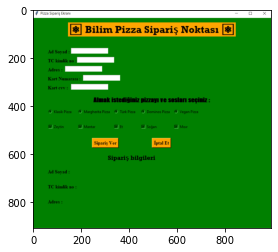

In [3]:
img = cv.imread("9.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

Butona basıldığında yukarıdaki çıktı çıkıyor

Butona basılınca sipariş oluşturulsun

In [11]:
from tkinter import messagebox

In [13]:
siparis = tk.Tk()
siparis.title("Pizza Sipariş Ekranı")
siparis.geometry("800x700+100+50")
siparis.maxsize(800,1500)
siparis.config(bg="green")

label = tk.Label(siparis,text="⚛︎ Bilim Pizza Sipariş Noktası ⚛︎",bg="orange",fg="black",font="Rockwell 25 bold")
label.pack(pady=15)

label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=100)
entry_ad = tk.Entry().place(x=130, y=100)

label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=130)
entry_ad = tk.Entry().place(x=150, y=130)

label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=160)
entry_ad = tk.Entry().place(x=110, y=160)

label_card_num = tk.Label(siparis,text="Kart Numarası :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=190)
entry_card_num = tk.Entry().place(x=170,y=190)

label_card_cvv = tk.Label(siparis,text="Kart cvv :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=220)
entry_card_cvv = tk.Entry().place(x=130,y=220)

pizza_sorusu = tk.Label(siparis,text="Almak istediğiniz pizzayı ve sosları seçiniz :",font="Impact 15 bold",fg="black",bg="green")
pizza_sorusu.pack(pady=180,anchor="center")

deger = tk.StringVar()

rad_klasik = tk.Radiobutton(siparis,text ="Klasik Pizza",activebackground="green",bg="green",value="Klasik",variable=deger).place(x = 50 ,y=300)

rad_margherita = tk.Radiobutton(siparis,text ="Margherita Pizza",activebackground="green",bg="green",value="Margherita",variable=deger).place(x = 150 ,y=300)

rad_turk = tk.Radiobutton(siparis,text ="Türk Pizza",activebackground="green",bg="green",value="Türk",variable=deger).place(x = 270 ,y=300)

rad_dominos = tk.Radiobutton(siparis,text ="Dominos Pizza",bg="green",value="Dominos",variable=deger).place(x =360 ,y=300)

rad_vegan = tk.Radiobutton(siparis,text ="Vegan Pizza",bg="green",value="Vegan",variable=deger).place(x = 470 ,y=300)

zeytin = tk.StringVar()
mantar = tk.StringVar()
et = tk.StringVar()
sogan = tk.StringVar()
misir = tk.StringVar()

check_zeytin = tk.Checkbutton(siparis,text="Zeytin",variable=zeytin,onvalue="Zeytin",bg="green").place(x=50,y=350)

check_mantar = tk.Checkbutton(siparis,text="Mantar",variable=mantar,onvalue="Mantar",bg="green").place(x=150,y=350)

check_et = tk.Checkbutton(siparis,text="Et",variable=et,onvalue="Etli",bg="green").place(x=270,y=350)

check_sogan = tk.Checkbutton(siparis,text="Soğan",variable=sogan,onvalue="Soğanlı",bg="green").place(x=360,y=350)

check_misir = tk.Checkbutton(siparis,text="Mısır",variable=misir,onvalue="Mısırlı",bg="green").place(x=470,y=350)

def siparis_ver():
    label_ad = tk.Label(siparis,text="Ad Soyad :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=500)
    label_tc = tk.Label(siparis,text="TC kimlik no :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=550)
    label_adres = tk.Label(siparis,text="Adres :",bg="green",fg="black",font="Times 12 bold").place(x=50,y=600)
    
def iptal_et():
    siparis.quit() #Formdan çıkış yapar
    
def mesaj():
    messagebox.showinfo(title="Bilim pizza sipariş onayı",message="Kartınızdan ücret alınmış ve sipariş tamamlanmıştır")
    


siparis_btn = tk.Button(siparis,text="Sipariş Ver",bg="orange",font="Times 12 bold",command=mesaj).place(y=400,x=200)

iptal_btn = tk.Button(siparis,text="İptal Et",bg="orange",font="Times 12 bold",command=iptal_et).place(y=400,x=400)

#Sipariş bilgileri
label_bilgi = tk.Label(siparis,text="Sipariş bilgileri",bg="green",fg="black",font="Rockwell 16 bold").place(y=450,x=250)

siparis.mainloop()

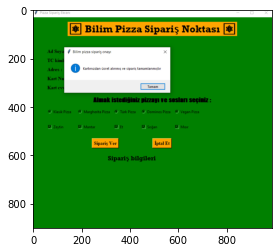

In [14]:
img = cv.imread("10.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

# CSV dosyası olarak kayıt etme işlemi

In [15]:
import csv 
import datetime as dt

In [16]:
simdi = dt.datetime.now() 
zaman = dt.datetime.strftime(simdi, "%d-%m-%Y %B %A %H:%M:%S")

simdi = datetime.now() şimdiki zamanı alır

In [ ]:
with open('Orders_Database.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([tarih,adSoyad,telNo,adres,kartNo,self.pizzam.get_description(),self.pizzam.get_cost()])

Yapısı ile csv açılıp kaydetme yapılabilir

Farklı olarak python ile yazılıp exe ye çevirdiğim uygulamayıda eklere ekliyorum

# İşlerin  yoğunluğundan başka tarz yapmaya zaman kalmamıştır :C

In [131]:
import csv 
import datetime as dt

Öncelikle bir tane main fonksiyon yazalım projede belirtilen gibi

In [129]:
def main():
    pass

Şimdi bizim kodla kaydettiğimiz menu.txt okutalım menü olarak kullanalım lakin biz burada fazladan pizza ürettiğimiz için menüyü değiştirmeliyiz

In [1]:
with open('menu.txt', 'w',encoding="utf-8") as menu:         #Dosyayı yarattık ve menu olarak içeri aktardık ki yazma yapalım
    menu.write('* Lütfen Bir Pizza Tabanı Seçiniz: \n')
    menu.write('1: Klasik Pizza \n')
    menu.write('2: Margherita Pizza \n')
    menu.write('3: Türk Pizza \n')
    menu.write('4: Dominos Pizza \n')
    menu.write('5: Vegan Pizza \n')
    menu.write('* ve seçeceğiniz sos: \n')
    menu.write('11: Zeytin \n')
    menu.write('12: Mantarlar \n')
    menu.write('13: Keçi Peyniri \n')
    menu.write('14: Et \n')
    menu.write('15: Soğan \n')
    menu.write('16: Mısır \n')
    menu.write('* Teşekkür ederiz!')

Okutacağımız için kodu r olacaktır

In [2]:
with open("menu.txt","r") as menu:
    menu = menu.read()
print(menu)

* LÃ¼tfen Bir Pizza TabanÄ± SeÃ§iniz: 
1: Klasik Pizza 
2: Margherita Pizza 
3: TÃ¼rk Pizza 
4: Dominos Pizza 
5: Vegan Pizza 
* ve seÃ§eceÄŸiniz sos: 
11: Zeytin 
12: Mantarlar 
13: KeÃ§i Peyniri 
14: Et 
15: SoÄŸan 
16: MÄ±sÄ±r 
* TeÅŸekkÃ¼r ederiz!


Farktettiysek üstteki gibi türkçe karakterler gözükmedi hadi utf-8 kullanalım 

In [3]:
with open("menu.txt","r",encoding="utf-8") as menu:
    menu = menu.read()
print(menu)

* Lütfen Bir Pizza Tabanı Seçiniz: 
1: Klasik Pizza 
2: Margherita Pizza 
3: Türk Pizza 
4: Dominos Pizza 
5: Vegan Pizza 
* ve seçeceğiniz sos: 
11: Zeytin 
12: Mantarlar 
13: Keçi Peyniri 
14: Et 
15: Soğan 
16: Mısır 
* Teşekkür ederiz!


menumuz düzgünce ekrana basıldı hadi diğer işlemleri yapalım

Sıra tabanlı seçim gibi buradaki numaraları seçerek işlem yapmalıyız

In [4]:
pizza_turu = input("Lütfen pizza türünüzün numarasnı giriniz:")

Lütfen pizza türünüzün numarasnı giriniz:54


Döngü kurup döngü bir ifade girildiğinde döngüyü bitirmeliyiz

In [7]:
    pizza_turu = input("Lütfen pizza türünüzün numarasnı giriniz:")
    while pizza_turu not in ["1","2","3","4","5"]:
        pizza_turu = input("Geçerli bir pizza seçiniz :")
    pizza_turu = int(pizza_turu)

Lütfen pizza türünüzün numarasnı giriniz:6
Lütfen geçerli bir pizza türü seçiniz (1-4): 4


Şimdi sos türü seçtirelim

In [8]:
sos_turu = input("Sos numarasını giriniz :")

Sos numarasını giriniz :5


Döngü kuralım tekrardan

In [11]:
    sos_turu = input("Lütfen bir sos seçiniz (11-16): ")
    while sos_turu not in ["11","12","13","14","15","16"]:
        sos_turu = input("Geçerli bir sos seçiniz :")
    sos_turu = int(sos_turu)

Lütfen bir sos seçiniz (11-16): 1
Geçerli bir sos seçiniz :15


Şimdi şart bloklarıyla kullanıcı girişinden sonra seçimi yapalım